In [1]:
# mengimport library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

# Data Preparation

In [4]:
# read data dari file csv
df = pd.read_csv("data/NewData.csv")
df

NameError: name 'pd' is not defined

# Data Exploration

### Attributes Correlation

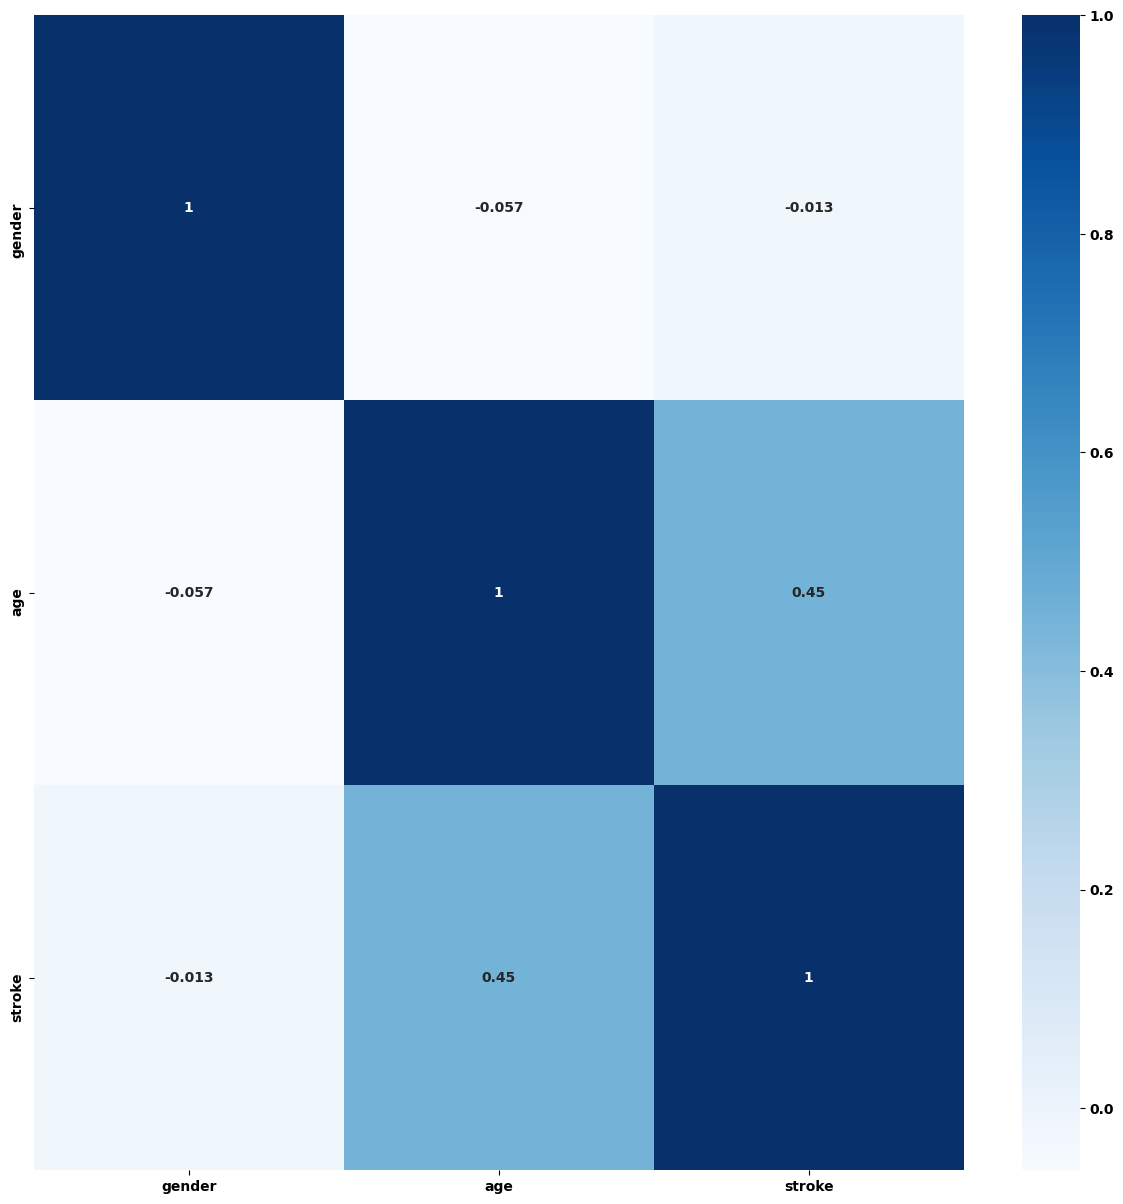

In [3]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

In [3]:
# Number of stroke
F = df[df['stroke'] == 0].count()['stroke']
M = df[df['stroke'] == 1].count()['stroke']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Tidak', 'Ya'], height = [F, M])
plt.xlabel('output')
plt.title('Number of Stroke')
plt.show()

NameError: name 'df' is not defined

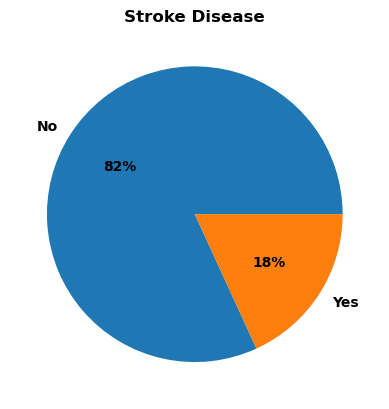

In [5]:
    labels = ['No', 'Yes']
    values = df['stroke'].value_counts().values

    plt.pie(values, labels=labels, autopct='%1.0f%%')
    plt.title('Stroke Disease')
    plt.show()

#### Note:



### Gender Exploration

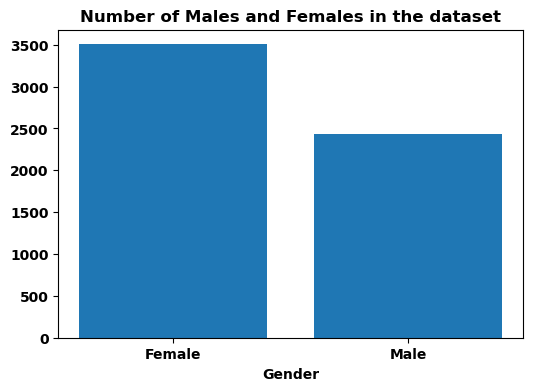

In [6]:
# Number of males and females
F = df[df['gender'] == 0].count()['stroke']
M = df[df['gender'] == 1].count()['stroke']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

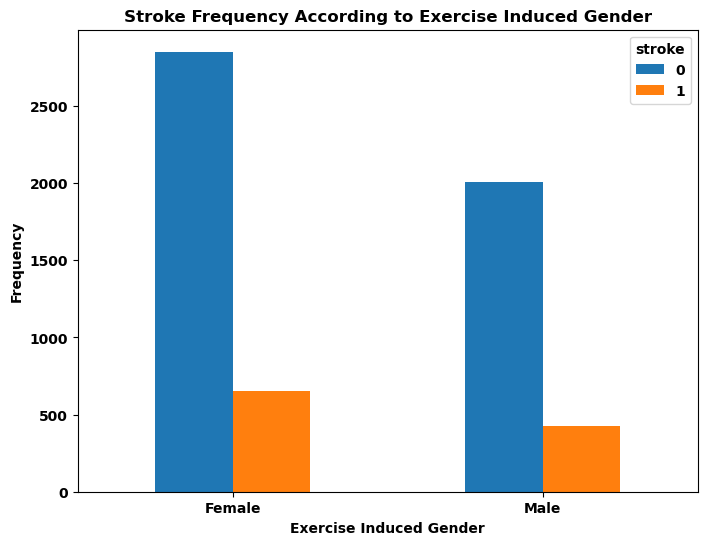

In [7]:
# Display exercise induced gender  based on the target
pd.crosstab(df.gender, df.stroke).plot(kind = "bar", figsize = (8, 6))
plt.title('Stroke Frequency According to Exercise Induced Gender')
plt.xlabel('Exercise Induced Gender')
plt.xticks(np.arange(2), ('Female', 'Male'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Age Exploration

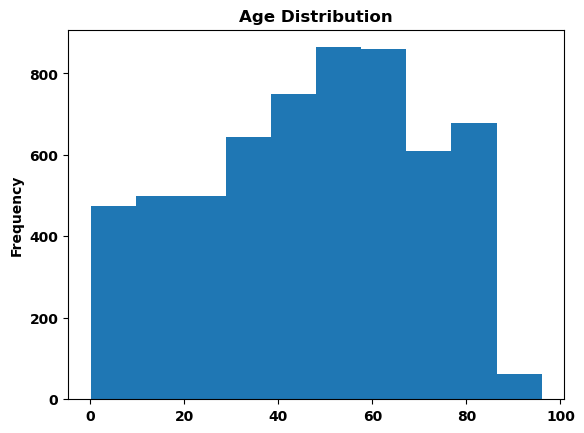

In [8]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [9]:
# Get min, max and average of the age
print('Min age: ', min(df['age']))
print('Max age: ', max(df['age']))
print('Average age: ', df['age'].mean())

Min age:  0.08
Max age:  96.0
Average age:  46.94780266038055


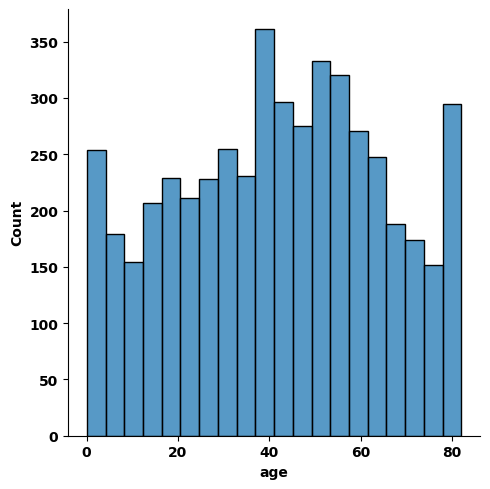

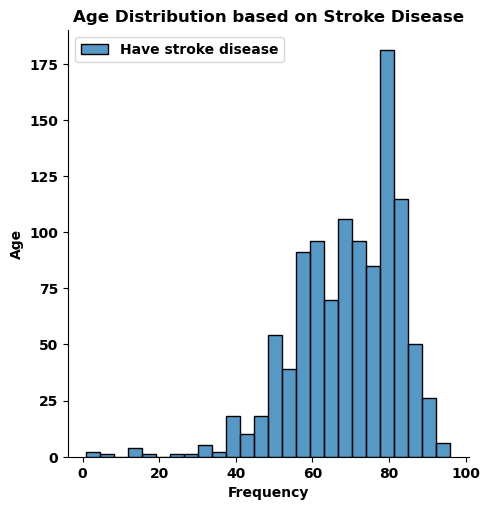

In [10]:
# Display age distribution based on stroke disease
sns.displot(df[df['stroke'] == 0]['age'], label='Do not have stroke disease')
sns.displot(df[df['stroke'] == 1]['age'], label = 'Have stroke disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Stroke Disease')
plt.legend()
plt.show()

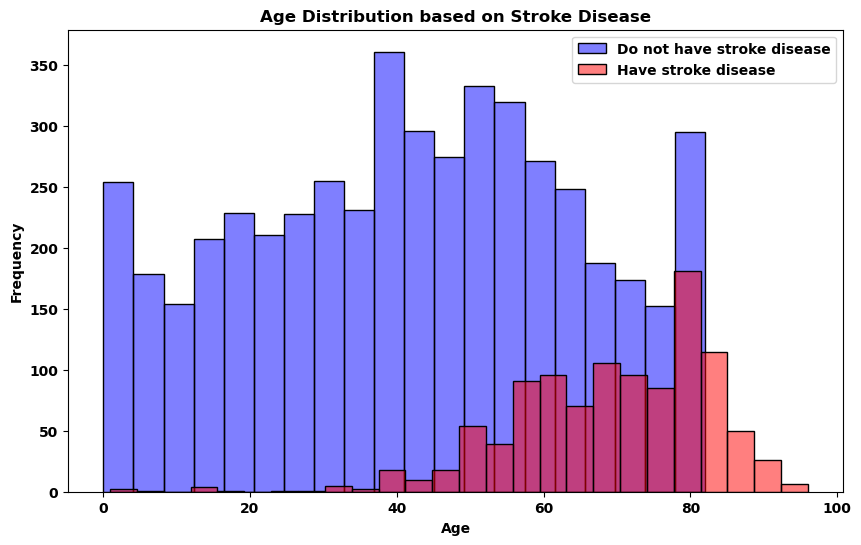

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(10, 6))

sns.histplot(data=df[df['stroke'] == 0], x='age', label='Do not have stroke disease', color='blue', alpha=0.5)
sns.histplot(data=df[df['stroke'] == 1], x='age', label='Have stroke disease', color='red', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution based on Stroke Disease')
plt.legend()
plt.show()


In [12]:
# Get min, max and average of the age of the people do not have stroke diseas
print('Min age of people who do not have stroke disease: ', min(df[df['stroke'] == 0]['age']))
print('Max age of people who do not have stroke disease: ', max(df[df['stroke'] == 0]['age']))
print('Average age of people who do not have stroke disease: ', df[df['stroke'] == 0]['age'].mean())

Min age of people who do not have stroke disease:  0.08
Max age of people who do not have stroke disease:  82.0
Average age of people who do not have stroke disease:  41.971544949598865


In [13]:
print('Min age of people who have stroke disease: ', min(df[df['stroke'] == 1]['age']))
print('Max age of people who have stroke disease: ', max(df[df['stroke'] == 1]['age']))
print('Average age of people who have stroke disease: ', df[df['stroke'] == 1]['age'].mean())

Min age of people who have stroke disease:  1.0
Max age of people who have stroke disease:  96.0
Average age of people who have stroke disease:  69.38712430426716


#### Note:

From the data, I can say that the stroke disease infects the old and young people, and the probability of the old people te be infected is higher than young people.

### Hypertension Exploration

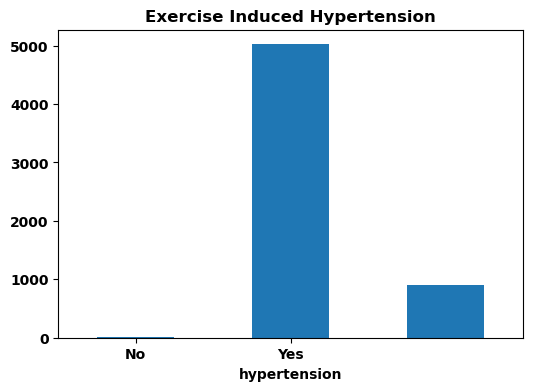

In [14]:
# Display exercise induced hypertension in bar chart
df.groupby(df['hypertension']).count()['stroke'].plot(kind = 'bar', title = 'Exercise Induced Hypertension',  figsize = (6, 4))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

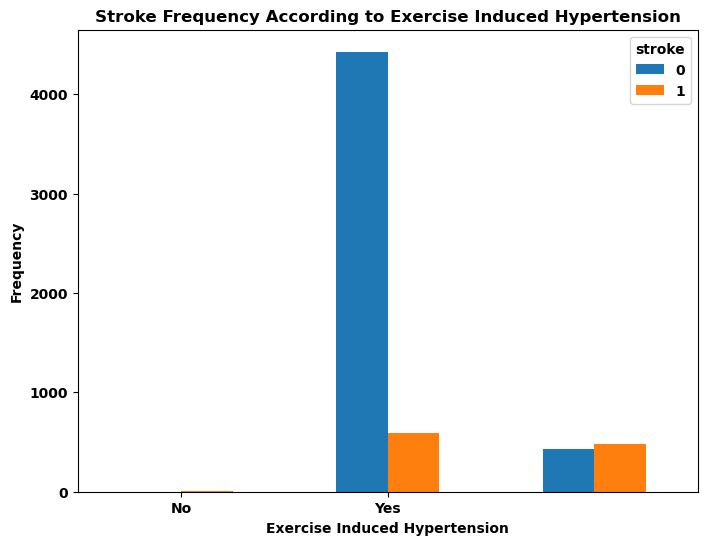

In [15]:
# Display exercise induced hypertensin  based on the target
pd.crosstab(df.hypertension, df.stroke).plot(kind = "bar", figsize = (8, 6))
plt.title('Stroke Frequency According to Exercise Induced Hypertension')
plt.xlabel('Exercise Induced Hypertension')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Heart Disease Exploration

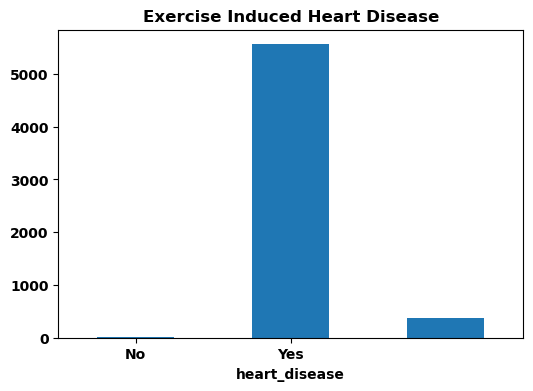

In [16]:
# Display exercise induced heart disease in bar chart
df.groupby(df['heart_disease']).count()['stroke'].plot(kind = 'bar', title = 'Exercise Induced Heart Disease',  figsize = (6, 4))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

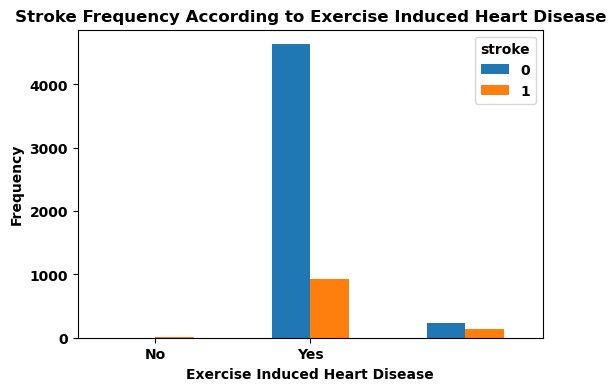

In [17]:
# Display exercise induced heart disease  based on the target
pd.crosstab(df.heart_disease,df.stroke).plot(kind = "bar", figsize = (6, 4))
plt.title('Stroke Frequency According to Exercise Induced Heart Disease')
plt.xlabel('Exercise Induced Heart Disease')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

# Data Prerocessing

In [18]:
# Replace '.' with NaN
df.replace('.', np.nan, inplace=True)

In [19]:
# mengecek value yang bernilai null dari setiap kolom
df.isnull().sum()

gender           0
age              0
heart_disease    7
hypertension     8
stroke           0
dtype: int64

In [20]:
# me-remove baris yang memiliki null value
df = df.dropna()
df

,gender,age,heart_disease,hypertension,stroke
0,1,76.0,1,0,1
1,1,58.0,0,0,1
2,1,74.0,1,1,1
3,0,77.0,0,1,1
4,0,76.0,0,1,1
...,...,...,...,...,...
5934,0,80.0,0,1,0
5935,0,81.0,0,0,0
5936,0,35.0,0,0,0
5937,1,51.0,0,0,0



### Using SMOTE to handle an imblance dataset

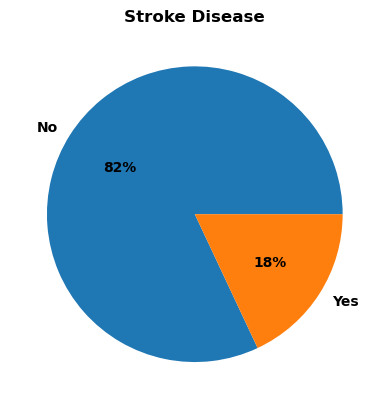

In [21]:
# plot stroke sebelum dilakukan smote
labels = ['No', 'Yes']
values = df.stroke.value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Stroke Disease')
plt.show()

In [22]:
# x adalah atribut yang mempengaruhi stroke
# y adalah label itu sendiri
x = df.drop(['stroke'],axis=1)
y = df['stroke']

In [23]:
# shape sebelum dilakukan smote
print(x.shape)
print(y.shape)

(5929, 4)
(5929,)


In [24]:
sm = SMOTE(random_state=30)
# sampling smote
x_sampling, y_sampling = sm.fit_resample(x, y)

In [25]:
# shape after resampling
print(x_sampling.shape)
print(y_sampling.shape)

(9722, 4)
(9722,)


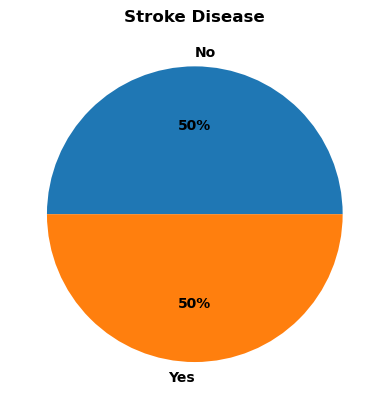

In [26]:
# plot stroke sesudah dilakukan smote
labels = ['No', 'Yes']
values = y_sampling.value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Stroke Disease')
plt.show()

In [27]:
df

,gender,age,heart_disease,hypertension,stroke
0,1,76.0,1,0,1
1,1,58.0,0,0,1
2,1,74.0,1,1,1
3,0,77.0,0,1,1
4,0,76.0,0,1,1
...,...,...,...,...,...
5934,0,80.0,0,1,0
5935,0,81.0,0,0,0
5936,0,35.0,0,0,0
5937,1,51.0,0,0,0


# Modeling (awal)

In [28]:
df

,gender,age,heart_disease,hypertension,stroke
0,1,76.0,1,0,1
1,1,58.0,0,0,1
2,1,74.0,1,1,1
3,0,77.0,0,1,1
4,0,76.0,0,1,1
...,...,...,...,...,...
5934,0,80.0,0,1,0
5935,0,81.0,0,0,0
5936,0,35.0,0,0,0
5937,1,51.0,0,0,0


### Selecting Feature

In [29]:
feature_cols = ['gender', 'age', 'hypertension', 'heart_disease']
X = x_sampling
y = y_sampling

### Splitting into Train and Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=89)

In [31]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7777, 4)

(7777,)

(1945, 4)

(1945,)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled

array([[ 1.2493001 ,  0.22116742, -0.31194083, -0.60597706],
       [ 1.2493001 , -0.21347847, -0.31194083,  0.21228972],
       [-0.80044819,  0.26463201, -0.31194083, -0.60597706],
       ...,
       [-0.80044819, -1.25662861, -0.31194083, -0.60597706],
       [-0.80044819, -0.69154053, -0.31194083,  1.67696601],
       [ 1.2493001 ,  0.52541954, -0.31194083,  1.67951209]])

In [34]:
X_test_scaled

array([[ 1.2493001 ,  0.04730906, -0.31194083, -0.60597706],
       [-0.80044819,  0.3080966 , -0.31194083,  1.67951209],
       [ 1.2493001 , -1.12623484, -0.31194083, -0.60597706],
       ...,
       [-0.80044819,  0.17770283, -0.31194083,  1.67951209],
       [-0.80044819, -0.25694306, -0.31194083, -0.60597706],
       [ 1.2493001 , -0.21347847, -0.31194083, -0.60597706]])


### Train the Model

In [35]:
# instantiate the model (using the default parameters)
# fit the model with data

lr = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)

### Predict with Test Dataset

In [36]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

### Model Evaluation

In [37]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[771, 205],
       [164, 805]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='actual'>

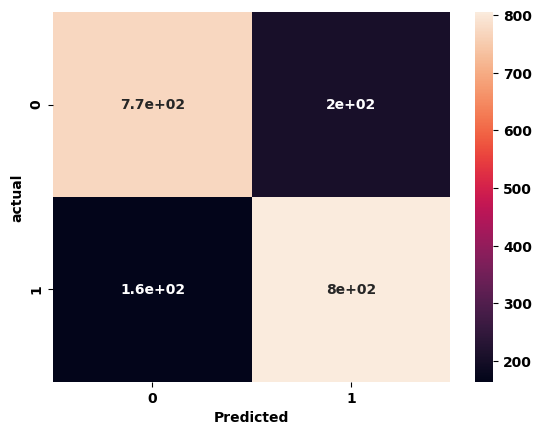

In [38]:
# Display heatmap of confusion matrix
cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

### Accuracy Score

In [39]:
accuracyScore = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracyScore)
print('Accuracy In Percentage : ', int(accuracyScore*100), '%')

Accuracy Score :  0.8102827763496144
Accuracy In Percentage :  81 %


### Classification Report

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       976
           1       0.80      0.83      0.81       969

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945



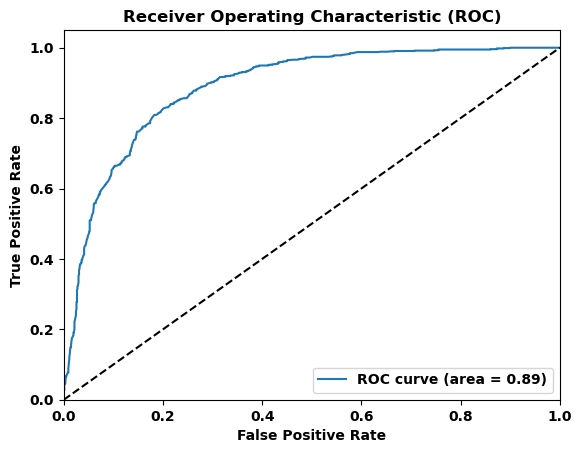

In [41]:
# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Obtain predicted probabilities and actual labels
y_pred = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC-ROC
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Reference line for random ROC
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Export Model

In [42]:
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)

# Koefisien Variabel

In [44]:
from sklearn.linear_model import LogisticRegression

# Menampilkan koefisien regresi
coefficients = lr.coef_[0]
intercept = model.intercept_

# Menampilkan koefisien dan intercept
print("Intercept:", intercept)
for i, coef in enumerate(coefficients):
    print(f"Koefisien untuk variabel ke-{i+1}: {coef}")


Intercept: [-5.00552772]
Koefisien untuk variabel ke-1: 0.09020119871091813
Koefisien untuk variabel ke-2: 1.7558938916682791
Koefisien untuk variabel ke-3: 0.010072172685665046
Koefisien untuk variabel ke-4: 0.6853986209434642
